# Link to Project

https://github.com/taimoon/ieee-cis-fraud-detection


# Executive Summary

## Description of the selected project

When choosing between a credit card and a debit card, the majority of people will always choose debit cards because they do not charge an annual fee, interest, or permit overspending. There are far too many misconceptions about credit cards, but credit cards are vastly superior to debit cards as long as you exercise financial discipline and spend within your way. Credit card payments make it simpler to prevent fraud-related losses. When a criminal uses your debit card, the funds disappear from your account immediately.

As an illustration of how credit cards really function in the real world, the following is IEEE-CIS Fraud Detection given example scenario: you are waiting in a long line at the grocery store, and the cashier refuses to accept your card. Your fate was probably determined by data science. Despite feeling ashamed, you give your credit card another attempt, knowing full well that you can have a fantastic nacho party for 50 of your closest friends. Repeated. A bank representative will text you once you leave the cashier. That's a "Cheddar five hundred," by the way. This uncomfortable fraud detection technology saves customers millions of dollars.

Customers are really saving millions of dollars each year as a result of this fraud prevention strategy, despite the fact that it may seem to be inconvenient at the time. So, we took use of the IEEE-CIS Fraud Detection dataset from a Kaggle competition to try our hand at detecting fraudulent online transactions using machine learning and Exploratory data analysis.

In General, the IEEE-CIS Fraud Detection dataset consists of 4 files of datasets, which are titled "train transactions," "train identity," "test transactions," and "test identity." Since the transactions data does not accompanying identity data, then our group decided to use transaction data only for the project.


## Problem to be solved

In the datasets for this competition, we are making predictions about the chance that an online transaction is fraudulent, and the binary target we are using to express this probability is called isFraud. We need to make a prediction about the probability of the isFraud variable for each TransactionID that is included in the test set.

Therefore, we may conclude that the objective of this project is the following:

1.  To examine the data and summarise the main insights, errors, and outliers, as well as to comprehend the various patterns in the data by making use of the Exploratory data analysis, without modifying the data.
2. To construct an ETL pipeline for data preprocessing prior to using machine learning to identify fraudulent transactions.
3. To identify potentially fraudulent transactions by the use of the machine learning method.

## Dataset Basic Description

The dataset of IEEE transactions consists of 590540 transactions with 392 transaction features. There are several fascinating categorization elements, such as card information. The IEEE transactions also contain address, distance and transaction amount.

Please note that in this report, we use the zip that include all dataset csv together. The data is broken into two files identity and transaction, which are joined by TransactionID. Not all transactions have corresponding identity information. As described by host,

Transaction Table *
- TransactionDT: timedelta from a given reference datetime (not an actual timestamp)
- TransactionAMT: transaction payment amount in USD
- ProductCD: product code, the product for each transaction
- card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.
- addr: address
- dist: distance
- P_ and (R__) emaildomain: purchaser and recipient email domain
- C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.
- D1-D15: timedelta, such as days between previous transaction, etc.
- M1-M9: match, such as names on card and address, etc.
- Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.

Categorical Features:
- ProductCD
- card1 - card6
- addr1, addr2
- P_emaildomain
- R_emaildomain
- M1 - M9

Identity Table *

Variables in this table are identity information – network connection information (IP, ISP, Proxy, etc) and digital signature (UA/browser/os/version, etc) associated with transactions.
They're collected by Vesta’s fraud protection system and digital security partners.
(The field names are masked and pairwise dictionary will not be provided for privacy protection and contract agreement)

Categorical Features:
- DeviceType
- DeviceInfo
- id_12 - id_38

## Additional Information about datasets
1. Further Information and related discussion - https://www.kaggle.com/c/ieee-fraud-detection/discussion/101203
2. Kaggler's insight - https://www.kaggle.com/c/ieee-fraud-detection/discussion/101203#610146
3. Labelling logic - https://www.kaggle.com/c/ieee-fraud-detection/discussion/101203#589276
4. Main Ideas from Grandmaster's EDA - https://www.kaggle.com/code/cdeotte/eda-for-columns-v-and-id/notebook

### Acknowledgements
Excerpt from Kaggle

![vesta_logo](Vesta-logo_200x.png)

Vesta Corporation provided the dataset for this competition. Vesta Corporation is the forerunner in guaranteed e-commerce payment solutions. Founded in 1995, Vesta pioneered the process of fully guaranteed card-not-present (CNP) payment transactions for the telecommunications industry. Since then, Vesta has firmly expanded data science and machine learning capabilities across the globe and solidified its position as the leader in guaranteed ecommerce payments. Today, Vesta guarantees more than $18B in transactions annually.

Header Photo by Tim Evans on Unsplash

# Summary of EDA

The main purpose of exploratory data analysis (EDA) determine strategies of the imputation, encoding, aggregration, reduction and transformation for each feature.

There are too much data to be fed into to later model development. Hence, feature selection is essential here. Feature selection techniques adopted are missing value analysis and correlation analysis.

Firstly, we group the features based on whether their missing values are happening together. This results multiple pages for example V1 until V11 are related via their missing values.

Since it is computationally infeasible to compute the correlation matrix of all 300++ vesta rich features, we compute correlation matrix of smaller pages that are found earlier. From that, we futher group the features based correlation value (i.e.: see `naive_reduce` function). Counting and temporal attributes are also grouped via this correlation selection approach. The grouped variables will be aggregrated into a sinlge variable in preprocessing step.

For identity dataset, we see that that identity info and fraudelent transaction are not strongly correlated (neither positve nor negative). Furthermore, not all identity info are provided, then we decide not to include them as input features for model developed.

# Methodology



The rationales behind the choices of preprocessing algorithms are made based on EDA. We adopt ELT steps that is extract, load and transform. 

## ELT Pipeline of Preprocessing 
We only apply few transformation at the data reading (e.g.: switching index, categorical typing and data enrichment), then the data will be fed into the preprocessing pipeline we have developed using sklearn library. The preprocessing pipeline only involves label encoding, missing value imputation, reduction via aggregration and numerical normalization.

> The order of the columns in the transformed feature matrix follows the order of how the columns are specified in the transformers list. Columns of the original feature matrix that are not specified are dropped from the resulting transformed feature matrix, unless specified in the passthrough keyword. Those columns specified with passthrough are added at the right to the output of the transformers.

In developing pipeline under `sklearn` framework, `ColumnTransformer` apply transformations parallelly whereas `Pipeline` apply transformations sequentially. Thus, we mix them to achive desired overall transformation. 

The results are a 2D array for features and a 1D array input target. The order of resultant feature array does not order as original data frame as mentioned by `sklearn` documentation. 

Using the results from EDA section, we will reduce features based on basis of correlation (i.e.: subsets group). To impute missing value and aggregate grouped variables, we have defined a basic unit constructor `impute_reduce_pipe`. `correlated_group_reducer` is built upon the `impute_reduce_pipe`.

Initially, we want the reducer adjust its imputation and aggregration strategies based on the grouped variables. For example, for one variable, we can skip; for 2 to 5, we can take the average; for more than 5, we do dimension reduction PCA. However, due to the size of dataset, KNN imputation and dimension reduction techniques don't scale well; too slow. Hence, we don't adopt such strategy.

As a result, we reduce 300++ features to 178 input features.

### Rationales of developing pipeline
Suppose that we've 10 input feature and 1 categorical target. The input feature is a random mix of categorical and continuous feature. We develop a code that impute and encode each feature accordingly and one-hot encode the categorical feature. We can use `ColumnTransformer` and `Pipeline` to describe such processing step so that the preprocessor receives and transform any data frame that has the same format. Furthermore, the preprocessor 'should' known how to inverse transform each encoded feature. Unfortunately, the complete inversible pipeline implementation is cumbersome and time consuming if using current `sklearn` framework.

## Modelling and Evaluation
> Champion's solution - https://www.kaggle.com/competitions/ieee-fraud-detection/discussion/111308

Refering to the competition champion's solution, XGB model perform very well. Therefore, we adopt the same model (i.e.: `n_estimator = 2000`). Once we done model development and training, we submit the `submission.csv` to Kaggle viewing the percision score. 

Since the target feature distribution is heavily imbalanced, f1-score is used rather than accuracy. The higher the value F1-score, the better the model performs. F1-score is defined as follow:

$$
F_1 = 2\frac{\text{precision}\cdot\text{recall}}{\text{precision} + \text{recall}}
$$

Precision is the fraction of true positive among positive; recall is the fraction of true positive among positive prediction. They are defined as follow

$$
\text{precision} = \frac{|\text{revelant document} \cap \text{retrieved document}|}{|\text{retrieved document}|} = \frac{|\text{predicted true positive}|}{|\text{predicted positive}|}
$$

$$
\text{recall} = \frac{|\text{revelant document} \cap \text{retrieved document}|}{|\text{relevant document}|} = \frac{|\text{predicted true positive}|}{|\text{all true positive}|}
$$

## Deployment

The `deployment.py` plot a windowed time series chart whose peak indicate a suspect transaction. It involves using `ELT.py`'s data generator to simulate the process of fetching data from other sources.

```
$python deployment.py
```

# Result and Discussion

## Example Kaggle Submission Result
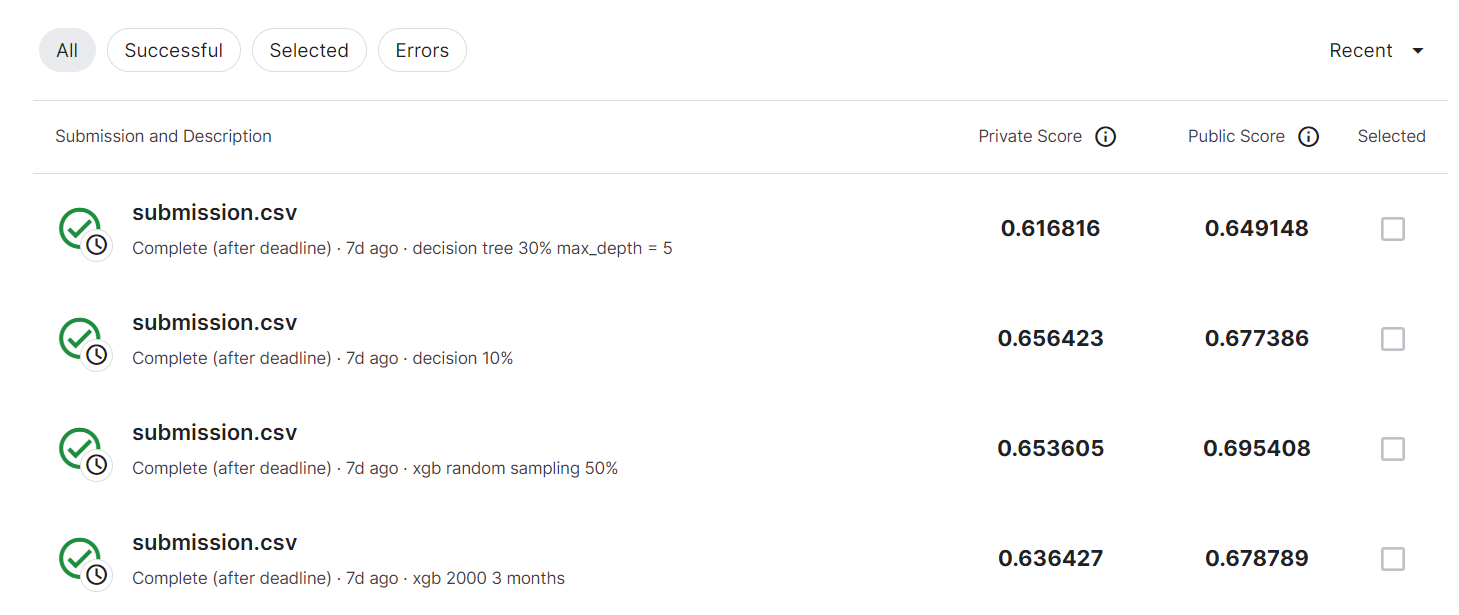

We've tried different model with different parameters (e.g.: random forest and decision tree), the precision score is still capped at 0.70 whereas top 100 solutions all have above 0.95 score.The low percision score is due to we don't include identity dataset in model training. This is also because we don't aggressively engineer our features via time consistency checking. 

In [1]:
with open('model classification report.txt', 'r') as f:
    print(f.read())

train dataset
f1-score = 0.888539350219667
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    285043
           1       1.00      0.80      0.89     10227

    accuracy                           0.99    295270
   macro avg       1.00      0.90      0.94    295270
weighted avg       0.99      0.99      0.99    295270

test dataset
f1-score = 0.683117041369646
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    284834
           1       0.94      0.54      0.68     10436

    accuracy                           0.98    295270
   macro avg       0.96      0.77      0.84    295270
weighted avg       0.98      0.98      0.98    295270



![eval_plot](confusion_and_roc.png)

## Discussion of Result
The isFraud data is heavily imbalanced that there are only a few fradulent transactions (i.e.: 3%). Then, accuracy of model might not convey info as much as percision score does. For instance, there is no big difference in accuracy between training and testing dataset. However, f1-score is very low in validation comparing to training phase. Furthermore, AUC of test dataset is smaller than in train dataset.

In fraud detection application, we wish our model first doesn't misclassify too many legitimate transactions, then correctly classify fraud transactions. The confusion matrix shows that our model reasonably predict correct legitimate transaction although only half of the fraudulent transaction is correctly predicted in testing phase.

In short, our model f1-score is 0.68 for test dataset target isFraud is true.

## Discussion of Spliting

There are at least 2 strategies in spliting datasets: 
1. using first few months datasets as training and remaining are validation
2. random spliting. 

The first approach is more objective as the model could not learn from future but being judged how it performs using past data (training) in future data (validation). In comparison, random spliting allows the model learn more info that is not available during training as in first approach. However, our experiments shows that in first approach, our model does not perform as well as in second approach. Thus, we only include the result that is based on second approach.

# Conclusion

In conclusion, our developed model f1-score is 0.68 for test dataset target isFraud is true. This is consistent with the score shown in Kaggle submission. 

## Contribution
Fraud impacts the businesses and society not only monetary losses but also destroy the trust. Customers are more likely move to a more conventional way of paying if current e-pay platform has a high fradulent activity; they reluctant to use it. Therefore, it is the early fraud detection to maintain the credibility of e-pay platform.

As online transaction is a trend, our project is an example application of fraud detection for such scenario.

# References

IEEE-CIS Fraud Detection | Kaggle. (2019). https://www.kaggle.com/c/ieee-fraud-detection/discussion/101203

Tudor L. IEEE-CIS Fraud Detection | Kaggle. (2019).[*This discussion has a lot of comments and it takes time to read all of them :) ...*] https://www.kaggle.com/c/ieee-fraud-detection/discussion/101203#610146

Lynn. IEEE-CIS Fraud Detection | Kaggle. (2019). [*It's a good question. Yes, they're all real data, no synthetic data. The logic of our labeling is ...*]Vesta. https://www.kaggle.com/c/ieee-fraud-detection/discussion/101203#589276

Chris D. (2020). Jupyter Notebooks - EDA for Columns V and ID. https://www.kaggle.com/code/cdeotte/eda-for-columns-v-and-id/notebook

Chris D. (2020). Jupyter Notebooks - 1st Place Solution - Part 2. https://www.kaggle.com/competitions/ieee-fraud-detection/discussion/111308